In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import re

import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
lepping_db = niidb.FMriActivationsDb('data/sound_depression.db', mask='/home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz')

In [5]:
dtfa = DTFA.DeepTFA(lepping_db.all(), mask='/home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz', num_factors=100, embedding_dim=2)

01/18/2019 19:08:56 Loading Nifti image /home/eli/Documents/sound_depression/fmriprep/sub-control01/func/sub-control01_task-nonmusic_run-5_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz (zscore=True, smooth=6)
01/18/2019 19:08:58 Loading Nifti image /home/eli/Documents/sound_depression/fmriprep/sub-control01/func/sub-control01_task-music_run-3_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz (zscore=True, smooth=6)
01/18/2019 19:09:01 Loading Nifti image /home/eli/Documents/sound_depression/fmriprep/sub-control01/func/sub-control01_task-music_run-2_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz (zscore=True, smooth=6)
01/18/2019 19:09:03 Loading Nifti image /home/eli/Documents/sound_depression/fmriprep/sub-control01/

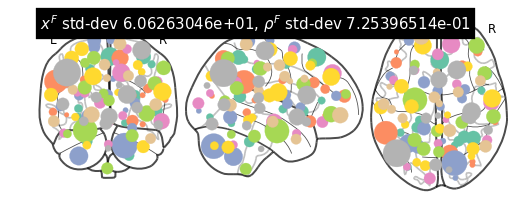

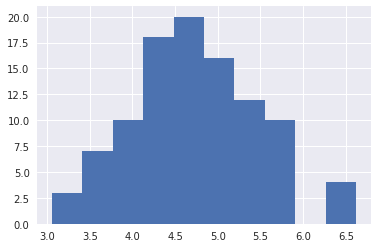

(<nilearn.plotting.displays.OrthoProjector at 0x7fa3290ad4e0>,
 tensor([[-3.1682e+01, -8.2350e+01, -7.3668e+00],
         [ 5.0891e+01,  1.5436e+01, -1.2730e+00],
         [ 4.6323e-02,  3.5224e+01,  1.0102e+01],
         [-1.9469e+01, -3.3320e+01,  4.3056e+01],
         [ 2.1776e+01, -5.5230e+01, -4.8358e+01],
         [ 3.7057e+01, -5.2165e+01,  5.5443e+01],
         [-2.2323e+01, -4.0745e+01, -3.3263e+01],
         [ 1.7242e+00,  3.0156e+01,  5.5800e+01],
         [-3.1413e+01, -5.5140e+00,  1.1153e+00],
         [ 2.7415e+01, -5.0667e+01,  1.4289e+01],
         [ 1.7358e+01, -5.9639e+01, -1.3920e+01],
         [ 4.5577e+01, -1.9306e+00,  4.7618e+01],
         [-3.9681e+01, -4.6363e+01,  5.3358e+01],
         [ 1.2351e+01, -6.8023e+01,  5.4155e+01],
         [-2.5747e+01, -5.9263e+00,  3.1397e+01],
         [-4.3796e+01,  3.8606e+01, -5.5291e+00],
         [ 2.2664e+01,  5.9197e+01,  1.4706e+01],
         [ 3.6057e+01, -8.0224e+01,  1.5032e+01],
         [ 4.1656e+01,  3.8981e+01,  

In [6]:
dtfa.visualize_factor_embedding()

In [7]:
losses = dtfa.train(num_steps=800, learning_rate=1e-2, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=50, blocks_batch_size=12, patience=100)

01/18/2019 19:15:34 [Epoch 1] (36237ms) Posterior free-energy 1.40191373e+09 = KL from prior 4.52037744e+03 - log-likelihood -1.40190963e+09
01/18/2019 19:15:34 Saving checkpoint...
01/18/2019 19:16:10 [Epoch 2] (36437ms) Posterior free-energy 1.32495962e+09 = KL from prior 8.67078516e+03 - log-likelihood -1.32495130e+09
01/18/2019 19:16:47 [Epoch 3] (36206ms) Posterior free-energy 1.27390170e+09 = KL from prior 1.54434590e+04 - log-likelihood -1.27388621e+09
01/18/2019 19:17:22 [Epoch 4] (35211ms) Posterior free-energy 1.23860531e+09 = KL from prior 2.42153711e+04 - log-likelihood -1.23858163e+09
01/18/2019 19:17:57 [Epoch 5] (35339ms) Posterior free-energy 1.21518771e+09 = KL from prior 3.33342617e+04 - log-likelihood -1.21515443e+09
01/18/2019 19:18:32 [Epoch 6] (35347ms) Posterior free-energy 1.19683648e+09 = KL from prior 4.28653438e+04 - log-likelihood -1.19679386e+09
01/18/2019 19:19:08 [Epoch 7] (35438ms) Posterior free-energy 1.18432973e+09 = KL from prior 5.36939961e+04 - log

RuntimeError: CUDA out of memory. Tried to allocate 86.38 MiB (GPU 0; 10.91 GiB total capacity; 3.24 GiB already allocated; 49.25 MiB free; 321.00 MiB cached)

In [ ]:
utils.plot_losses(losses)

In [ ]:
def subject_labeler(block):
    subject_regex = re.compile("([A-Za-z]+)([0-9]{1,2})")
    m = subject_regex.search(block.subject)
    condition, sub_num = m.groups()
    if condition == 'mdd':
        condition = 'Major Depressive'
    elif condition == 'control':
        condition = 'Control'
    return '%s Participant %d' % (condition, int(sub_num))

In [ ]:
def task_labeler(block):
    if block.task == 'negative_music':
        task = 'Negative music'
    elif block.task == 'positive_music':
        task = 'Positive music'
    else:
        task = block.task.capitalize()
    return task

In [ ]:
def lepping_2017_labeler(block):
    subject = subject_labeler(block)
    task = task_labeler(block)
    return subject + ', ' + task + ' stimulus'

In [ ]:
for b in np.random.choice(range(dtfa.num_blocks), 5):
    dtfa.plot_original_brain(b, labeler=lepping_2017_labeler)
    dtfa.plot_reconstruction(b, labeler=lepping_2017_labeler)

In [ ]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None)

In [ ]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None)

In [ ]:
dtfa.visualize_factor_embedding()

In [ ]:
dtfa.average_reconstruction_error()

In [ ]:
def condition_labeler(block):
    subject_regex = re.compile("([A-Za-z]+)([0-9]{1,2})")
    m = subject_regex.search(block.subject)
    condition, sub_num = m.groups()
    if condition == 'mdd':
        return 'Major Depressive'
    elif condition == 'control':
        return 'Control'
    return condition

In [ ]:
dtfa.scatter_subject_embedding(labeler=condition_labeler, figsize=None)